# 01 梯度下降法初阶

- 损失函数$J$
- 参数$\theta$
$$-\eta \frac{d J}{d \theta}$$
- $\eta$
    - $\eta$称为学习率(learning rate)
    - $\eta$的取值影响获得最优解的速度
    - $\eta$取值不合适，甚至得不到最优解
    - $\eta$是梯度下降法的一个超参数

- 并不是所有函数都有唯一的极值点
- 解决方案：
    - 多次运行，随机化初始点
    - 梯度下降法的起始点也是一个超参数

# 02 梯度下降法模拟

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5)**2 - 1

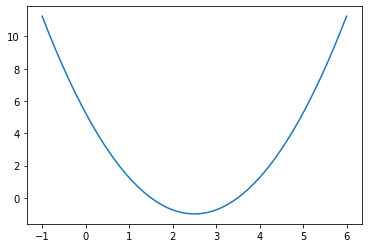

In [3]:
plt.plot(plot_x, plot_y)
plt.show()

In [4]:
def dJ(theta):
    return 2*(theta-2.5)

In [5]:
def J(theta):
    try:
        return (theta - 2.5)**2 - 1
    except:
        return float('inf')

In [6]:
eta = 0.1
epsilon = 1e-8
theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient

    if (abs(J(theta) - J(last_theta)) < epsilon):
        break
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


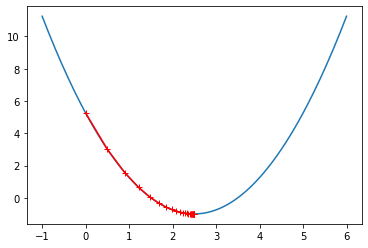

In [7]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)

    if (abs(J(theta) - J(last_theta)) < epsilon):
        break
        
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')
plt.show()

In [8]:
len(theta_history)

46

In [9]:
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if (abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1


def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history),
             J(np.array(theta_history)),
             color='r',
             marker='+')
    plt.show()

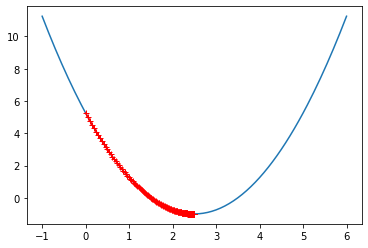

In [10]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [11]:
len(theta_history)

424

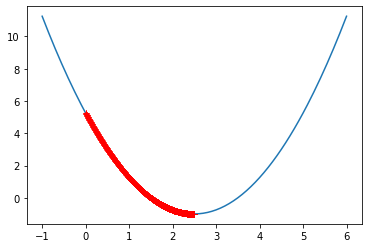

In [12]:
eta = 0.001
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [13]:
len(theta_history)

3682

In [14]:
eta = 1.1
theta_history = []
gradient_descent(0., eta)

In [15]:
len(theta_history)

10001

In [16]:
theta_history[100]

-207044933.80503917

In [17]:
theta_history[-1]

nan

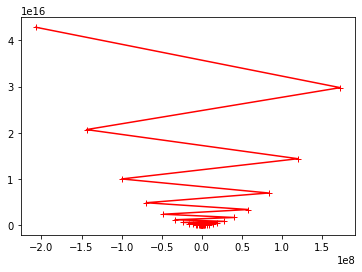

In [18]:
eta = 1.1
theta_history = []
gradient_descent(0., eta, n_iters=100)
plot_theta_history()

# 03 多元线性回归的梯度下降法

- $损失函数J$
$$J=\sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$$
- $参数\theta$
$$\theta=\left(\theta_{0}, \theta_{1}, \ldots, \theta_{n}\right)$$

- 目标求解：
$$- \eta \nabla J\ \ \ \mbox{其中：}\nabla J=\left(\frac{\partial J}{\partial \theta_{0}}, \frac{\partial J}{\partial \theta_{1}}, \ldots, \frac{\partial J}{\partial \theta_{n}}\right)$$

## 线性回归中使用梯度下降法

$$目标：使得J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\theta_{0}-\theta_{1} X_{1}^{(i)}-\theta_{2} X_{2}^{(i)}-\ldots-\theta_{n} X_{n}^{(i)}\right)^{2} = \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2} \mbox{尽可能小}$$

则
$$J(\theta)=M S E(y, \hat{y})\ \ \ \mbox{  有时取}J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$$


$$\nabla J(\theta)=\left(\begin{array}{c}
{\partial J / \partial \theta_{0}} \\
{\partial J / \partial \theta_{0}} \\
{\partial J / \partial \theta_{2}} \\
{\cdots} \\
{\partial J / \partial \theta_{n}}
\end{array}\right)  =\frac{1}{m}\left(\begin{array}{c}
{\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot(-1)} \\
{\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot\left(-X_{1}^{(i)}\right)} \\
{\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot\left(-X_{2}^{(i)}\right)} \\
{\cdots} \\
{\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot\left(-X_{n}^{(i)}\right)} 
\end{array}\right)=\frac{2}{m} \cdot\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right)} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}}
\end{array}\right)
$$

# 04 在线性回归模型下使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1, 1)

In [4]:
X.shape

(100, 1)

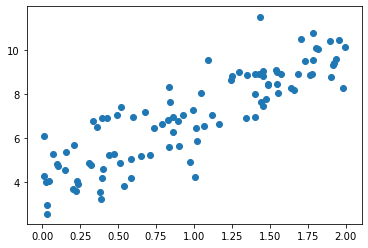

In [5]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')


def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])  # sum?
    return res * 2 / len(X_b)

In [7]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    #theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        #theta_history.append(theta)

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [8]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [9]:
theta

array([4.02145786, 3.00706277])

In [10]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [11]:
lin_reg.coef_

array([3.00706277])

In [12]:
lin_reg.interception_

4.021457858204859

# 05 线性回归中梯度下法的向量化

$$\nabla J(\theta)=\frac{2}{m} \cdot\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right)} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}} \\
{}
\end{array}\right) =\frac{2}{m} \cdot\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{0}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}} \\
{}
\end{array}\right)=\frac{2}{m} \cdot\left(X_{b} \theta-y\right)^{T} \cdot X_{b}
=\frac{2}{m} \cdot X_{b}^{T} \cdot\left(X_{b} \theta-y\right)
$$

$$\longrightarrow \nabla J(\theta)=\frac{2}{m} \cdot\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right)} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}} \\
{}
\end{array}\right)=\frac{2}{m} \cdot X_{b}^{T} \cdot\left(X_{b} \theta-y\right)
$$

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

CPU times: user 1.42 ms, sys: 655 µs, total: 2.07 ms
Wall time: 1.29 ms


0.8129794056212903

## 使用梯度下降法

### 批量梯度下降法 Batch Gradient Descent

In [5]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

/Users/doublc.qluv/opt/anaconda3/envs/ana/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/doublc.qluv/git_repo/Introduction-to-machine-learning/playML/LinearRegression.py:28: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta))**2) / len(y)
/Users/doublc.qluv/git_repo/Introduction-to-machine-learning/playML/LinearRegression.py:51: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


LinearRegression()

In [6]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [7]:
X_train[:10,]

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [8]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression()

In [9]:
lin_reg2.score(X_test, y_test)

0.27586818724477224

In [10]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)
lin_reg2.score(X_test, y_test)

CPU times: user 33.2 s, sys: 118 ms, total: 33.4 s
Wall time: 34.1 s


0.7542932581943915

## 数据归一化 （因为数据不在一个纬度上

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train_standard = standarScaler.transform(X_train)

In [14]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

CPU times: user 213 ms, sys: 6.73 ms, total: 220 ms
Wall time: 270 ms


LinearRegression()

In [15]:
X_test_standard = standarScaler.transform(X_test)

In [16]:
lin_reg3.score(X_test_standard,y_test)

0.8129873310487505

## 梯度下降法的优势

In [18]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0.0, 100.0, size=n + 1)

big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(\
    0., 10., size=m)

In [21]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X,big_y)

CPU times: user 19.1 s, sys: 411 ms, total: 19.5 s
Wall time: 6.36 s


LinearRegression()

In [22]:
big_reg2 = LinearRegression()
%time big_reg1.fit_gd(big_X,big_y)

CPU times: user 6.4 s, sys: 92.2 ms, total: 6.49 s
Wall time: 2.13 s


LinearRegression()

### 随机梯度下降法 Stochastic Gradient Descent

$$\nabla J(\theta)=\frac{2}{m} \cdot\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{0}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}} \\
{}
\end{array}\right) \longrightarrow 2 \cdot\left(X_{b}^{(i)}\right)^{T} \cdot\left(X_{b}^{(i)} \theta-y^{(i)}\right)
$$
$$学习率希望是逐渐递减的:\eta=\frac{1}{i_{-} iters}\xrightarrow{缓解次数过小时导致的学习率下降过快} \eta=\frac{1}{i_{-} iters+b}\xrightarrow{分子取a使得式子调整更灵活}\eta=\frac{a}{i_{-} iters+b}$$

#### 模拟退火的思想
$$本例中的学习率与时间有关:
\eta=\frac{t_{0}}{i_{-} \text {iters }+t_{1}}$$

#### 批量梯度下降

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

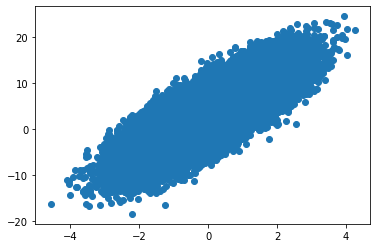

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(y)
    except:
        return float('inf')


def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)


def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    return theta

In [5]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 1.13 s, sys: 59.3 ms, total: 1.19 s
Wall time: 585 ms


In [6]:
theta

array([3.01070737, 3.99732042])

#### 随机梯度下降

In [7]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.


def sgd(X_b, y, initial_theta, n_iters):
    t0 = 5
    t1 = 50

    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [8]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b) // 3)

CPU times: user 492 ms, sys: 7.47 ms, total: 500 ms
Wall time: 521 ms


In [9]:
theta

array([3.00550134, 4.00769227])

# 07 scikit-learn中的随机梯度下降法
## 模拟数据使用自己的SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

In [3]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [4]:
lin_reg.coef_

array([4.01822867])

In [5]:
lin_reg.interception_

3.003526613794215

## 真实数据使用自己的SGD

In [6]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [7]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [8]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [9]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard,y_train,n_iters=2)
lin_reg.score(X_test_standard, y_test)

CPU times: user 6.6 ms, sys: 1.08 ms, total: 7.68 ms
Wall time: 7.02 ms


0.7857275413602651

In [10]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=50)
lin_reg.score(X_test_standard, y_test)

CPU times: user 137 ms, sys: 5.89 ms, total: 143 ms
Wall time: 144 ms


0.8085607570556209

In [11]:
%time lin_reg.fit_sgd(X_train_standard,y_train,n_iters=100)
lin_reg.score(X_test_standard, y_test)

CPU times: user 232 ms, sys: 11.2 ms, total: 243 ms
Wall time: 239 ms


0.8129434245278827

## scikit-learn中的SGD

In [12]:
from sklearn.linear_model import SGDRegressor

In [13]:
sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard,y_test)

CPU times: user 2.28 ms, sys: 227 µs, total: 2.5 ms
Wall time: 4.59 ms


0.8122443512755939

In [14]:
sgd_reg = SGDRegressor(n_iter_no_change=100)
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard,y_test)

CPU times: user 9.53 ms, sys: 1.11 ms, total: 10.6 ms
Wall time: 9.3 ms


0.8123899207286679

# 08 调试梯度

$$\mbox{计算某一点的导数：}\frac{d J}{d \theta}=\frac{J(\theta+\varepsilon)-J(\theta-\varepsilon)}{2 \varepsilon}$$
$$\mbox{计算高维导数：}$$
$$\theta=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right)\xrightarrow{求J对\theta 的导数} \frac{\partial J}{\partial \theta}=\left(\frac{\partial J}{\partial \theta_{0}}, \frac{\partial J}{\partial \theta_{1}}, \frac{\partial J}{\partial \theta_{2}}, \ldots, \frac{\partial J}{\partial \theta_{n}}\right)$$

$$\theta_{i}^{+}=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots,\theta_{i}+\varepsilon, \ldots,\theta_{n}\right)$$
$$\theta_{i}^{-}=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots,\theta_{i}-\varepsilon, \ldots,\theta_{n}\right)$$
$$则：\frac{\partial J}{\partial \theta_{i}}=\frac{J\left(\theta_{i}^{+}\right)-J\left(\theta_{i}^{-}\right)}{2 \varepsilon}$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

In [17]:
true_theta = np.arange(1, 12, dtype=float)

In [18]:
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [19]:
X.shape

(1000, 10)

In [20]:
y.shape

(1000,)

In [21]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(y)
    except:
        return float('inf')

In [23]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

In [24]:
def dJ_debug(theta, X_b, y, epsilon=0.01):  # 通用，可复用
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

In [25]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters=1e4,\
                     epsilon=1e-8):
    theta = initial_theta
    # theta_history.append(initial_theta)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        # theta_history.append(theta)

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    return theta

In [26]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

CPU times: user 21.7 s, sys: 384 ms, total: 22 s
Wall time: 6.65 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [27]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

CPU times: user 2.82 s, sys: 77.6 ms, total: 2.9 s
Wall time: 995 ms


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

# 09 梯度下降法 more
- 批量梯度下降法 Batch Gradient Descent 
- 随机梯度下降法 Stochastic Gradient Descent 
- 小批量梯度下降法 Mini-Batch Gradient Descent

<br>

## 随机
- 跳出局部最优解
- 更快的运行速率
- 机器学习领域很多算法都要使用随机的特点：
    - 随机搜索
    - 随机森林

## 梯度下降法
- 不是一个机器学习算法
- 是一种基于搜索的最优化方法
- 作用：最小化一个损失函数 
- 梯度上升法：最大化一个效用函数